In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv('./Data/taraweeh.csv')
df.head()

,days,tiredness,temperature,attend
0,1,7.641566,37.412506,0
1,2,6.880101,33.454553,0
2,3,1.863352,34.249389,1
3,4,2.837589,33.961324,1
4,5,0.384643,20.587696,1


In [40]:
X = df[['tiredness','temperature']]
y = df['attend']

In [41]:
k_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=8)

In [42]:
model = LogisticRegression()

In [43]:
accuracies, precisions, recalls, f1_scores = [], [], [], []

In [44]:
for train_idx, test_idx in k_fold.split(X, y):
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))
  f1_scores.append(f1_score(y_test, y_pred))

In [45]:
print(f"Average Accuracy: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f} ± {np.std(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f} ± {np.std(recalls):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")

Average Accuracy: 0.75 ± 0.09
Average Precision: 0.62 ± 0.41
Average Recall: 0.50 ± 0.35
Average F1 Score: 0.50 ± 0.29


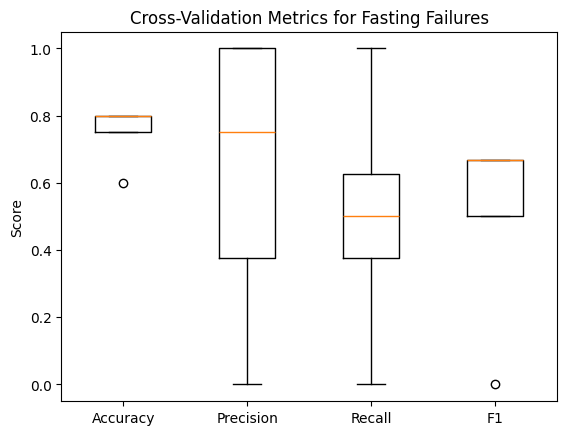

In [46]:
plt.boxplot([accuracies, precisions, recalls, f1_scores], labels=["Accuracy", "Precision", "Recall", "F1"])
plt.title("Cross-Validation Metrics for Fasting Failures")
plt.ylabel("Score")
plt.show()